# Perceptron

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alinaali/Data_Science_and_Machine_Learning/blob/main/Supervised%20Learning/Perceptron/Perceptron.ipynb)


The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p align="center">
    <img src="ThePerceptronImage.png" width="500">
</p>

## Data 
The Penguins dataset is used to implement and train this model. 


## Libraries/Packages: 
The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions

In [85]:
#Importing Libraries and Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()


## Data Preprocessing

I am saving the penguins dataset into pandas dataframe object so that I can easily work on this dataset.
There are total 345 rows and 7 columns.
The columns includes species, island, bill length, bill depth, flipper length, body mass, and sex.
I will focus on species, bill length, and bill depth columns for this model.

The dataset consists of 7 columns.

- species: penguin species (Adelie, Gentoo, and Chinstrap)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe)
- sex: penguin sex


<p align="center">
    <img src="penguins.png" width="500">
</p>


In [86]:
# Read the penguins dataset into a pandas DataFrame object
df = pd.read_csv("penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


It is important to drop na rows so that there willl be no issues during model training.

In [87]:
df= df.dropna()

In [88]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


After dropping na from the dataset now we have 334 rows and 7 columns.

I only want two species Adelie and Gentoo for the perceptron model to implement and to train so that it will identify species correctly. For that I am checking until which row number I will have a Gentoo specie, so the the data for these two species are contained in the first 265 rows of the data in df. I only need 265 rows to include Adelie and Gentoo species.

In [89]:
df.iloc[:265]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


The perceptron can take in any number of feature measurments, but for simplicity, I will focus on two feature measurements, namely "bill_length" and "bill_width". Moreover, also need to convert the string names associated with each species to numerical values; for example, map "Adelie" species to -1 and "Gentoo" species to 1. The following code preproccesses the data into these desired formats. 

In [90]:
# Store the desired species values in the numpy array y
y = df.iloc[0:265].species.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "bill_depth_mm"]].iloc[:265].values

## Data Visualization

It is essential to visualize the data. The penguins data is linearly separable. 
The pairplot shows the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

C:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


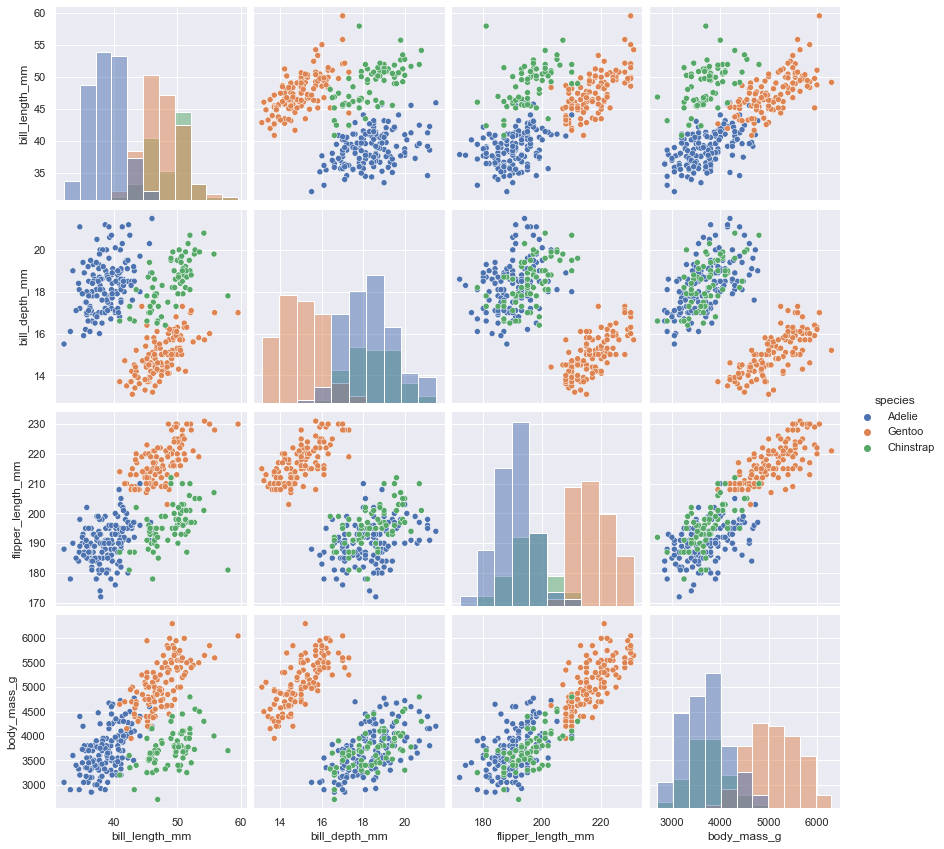

In [91]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

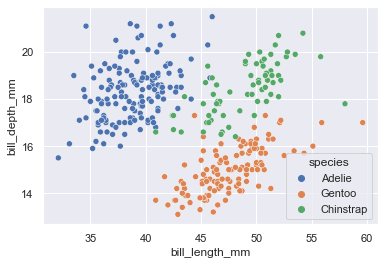

In [92]:
sns.scatterplot(x= "bill_length_mm", y= "bill_depth_mm", data=df, hue="species")

## Perceptron Model

 The perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

- 'w' represents real-valued weights vector
- 'b' represents the bias
- 'x' represents a vector of input x values.


This framework is implementing a single neuron model. Thus, next will write a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method. 


In [94]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

 ## Model Training
 The given code below instantiate an instance of the ```Perceptron``` class and also train this instance over 1000 epochs.


In [95]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

The next step is to call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. It shows predictions on the entries in ```X``` 

In [96]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T


The predicted values have matched the true values on the given data. The next step is to visualize this in the Euclidian plane by calling the ```plot_decision_regions``` function. This function will scatter the penguins data in the plane and also show the regions of space where a given point will be classified either -1 or 1.

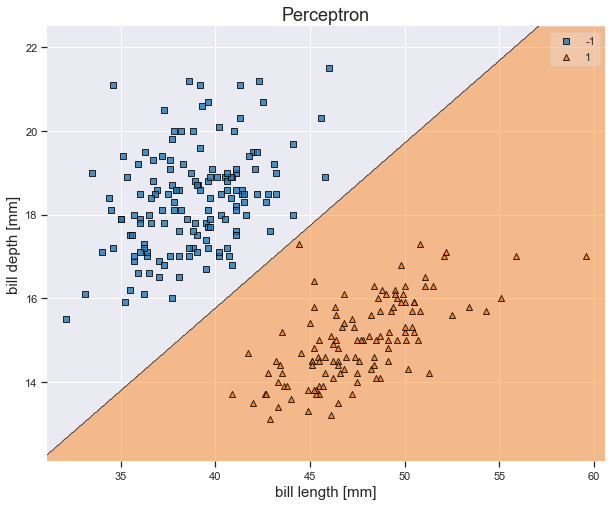

In [97]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

The plot shows a linear seperator which has classified our data. To check how long this perceptron model train, the ```Perceptron``` class we stored the error incured by the model at each iteration of an epoch in the ```errors_``` attribute. The given using below code will show errors over each epoch.

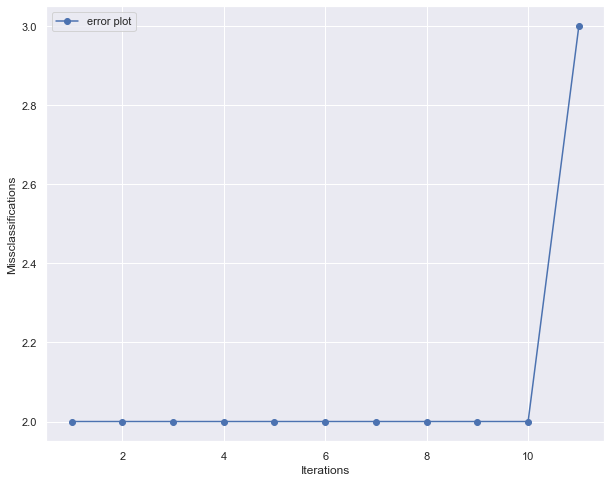

In [98]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

## Conclusion

After looking at the results, it is great to see that how the perceptron model works on this data set and it separates that two species by a linear boundary line.